In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
pca=pd.read_csv(r'Documents/nuts.csv')

In [64]:
pca.shape

(52, 9)

In [46]:
pca.head()

,Unnamed: 0,cones,ntrees,dbh,height,cover,sntrees,sheight,scover
0,1,61,32,0.23,20.420000,91.300003,1.004007,0.417350,0.514497
1,2,4,4,0.27,15.200000,61.500000,-1.015101,-0.864886,-3.121000
2,3,15,34,0.17,15.970000,91.400002,1.148229,-0.675744,0.526696
3,4,9,22,0.23,22.420000,92.000000,0.282897,0.908628,0.599894
4,5,42,22,0.18,19.450001,93.199997,0.282897,0.179080,0.746289


In [6]:
pca.describe()

,Unnamed: 0,cones,ntrees,dbh,height,cover,sntrees,sheight,scover
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01
mean,26.500000,17.923077,18.076923,0.278654,18.720962,87.082692,-1.928912e-08,-2.169982e-07,-3.220764e-07
std,15.154757,20.370919,13.867505,0.105756,4.071014,8.196956,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,0.000000,3.000000,0.120000,6.380000,54.400002,-1.087212e+00,-3.031422e+00,-3.987175e+00
25%,13.750000,3.750000,10.750000,0.215000,16.075001,85.099998,-5.283519e-01,-6.499515e-01,-2.418821e-01
50%,26.500000,11.000000,13.000000,0.270000,19.330000,90.000000,-3.661022e-01,1.496034e-01,3.559010e-01
75%,39.250000,22.750000,22.000000,0.342500,21.574999,92.049999,2.828971e-01,7.010628e-01,6.059938e-01
max,52.000000,91.000000,74.000000,0.790000,25.500000,94.800003,4.032670e+00,1.665196e+00,9.414847e-01


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import sklearn as sk

In [83]:
pca1=pca.iloc[:,1:]
pca1.head()

,cones,ntrees,dbh,height,cover,sntrees,sheight,scover
0,61,32,0.23,20.420000,91.300003,1.004007,0.417350,0.514497
1,4,4,0.27,15.200000,61.500000,-1.015101,-0.864886,-3.121000
2,15,34,0.17,15.970000,91.400002,1.148229,-0.675744,0.526696
3,9,22,0.23,22.420000,92.000000,0.282897,0.908628,0.599894
4,42,22,0.18,19.450001,93.199997,0.282897,0.179080,0.746289


In [84]:
pcascale=scale(pca1)
type(pcascale)

numpy.ndarray

In [85]:
frame=pd.DataFrame(pcascale)

In [86]:
frame.head()

,0,1,2,3,4,5,6,7
0,2.135259,1.013803,-0.464544,0.421422,0.519517,1.013803,0.421422,0.519517
1,-0.690146,-1.025005,-0.082626,-0.873324,-3.151449,-1.025005,-0.873324,-3.151449
2,-0.144893,1.159432,-1.037420,-0.682336,0.531835,1.159432,-0.682336,0.531835
3,-0.442304,0.285657,-0.464544,0.917493,0.605747,0.285657,0.917493,0.605747
4,1.193457,0.285657,-0.941941,0.180828,0.753571,0.285657,0.180828,0.753571


In [87]:
pc=PCA()
pco=PCA().fit_transform(frame)
pco=pc.fit_transform(frame)

In [88]:
var=pc.explained_variance_ratio_
var

array([4.01907190e-01, 3.38955720e-01, 1.26025033e-01, 9.81326283e-02,
       3.49794285e-02, 5.76396112e-17, 3.04885472e-17, 1.65294681e-17])

In [89]:
pccomp=pd.DataFrame(pc.components_)
pccomp.head()

,0,1,2,3,4,5,6,7
0,0.079634,-0.397692,0.466389,0.470512,0.092354,-0.397692,0.470512,0.092354
1,-0.359636,-0.345494,0.049726,-0.182077,-0.530638,-0.345494,-0.182077,-0.530638
2,0.402074,0.352248,0.149884,0.278564,-0.454158,0.352248,0.278564,-0.454158
3,0.730053,-0.173279,0.342538,-0.380363,0.011989,-0.173279,-0.380363,0.011989
4,-0.411922,0.261479,0.800132,-0.152289,0.059087,0.261479,-0.152289,0.059087


In [90]:
cumvar=np.cumsum(np.round(var,decimals=4)*100)
cumvar

array([ 40.19,  74.09,  86.69,  96.5 , 100.  , 100.  , 100.  , 100.  ])

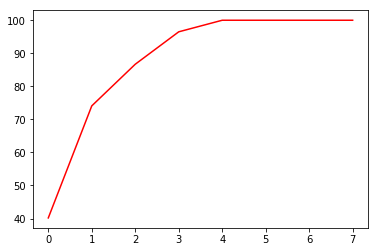

In [91]:
plt.plot(cumvar,color='red')
plt.show()

In [92]:
frame1=pd.DataFrame(pco)

In [93]:
frame1.head()

,0,1,2,3,4,5,6,7
0,-0.360454,-2.196355,1.266024,0.740257,-0.788045,1.314312e-08,8.188943e-09,3.467561e-10
1,-0.682141,4.614939,1.363970,0.411870,-0.424283,4.911894e-08,-1.023578e-08,-1.834074e-08
2,-1.961434,-1.116579,-0.260159,-0.331122,0.106619,-9.485816e-09,-9.581213e-09,-3.654442e-10
3,0.496182,-1.038391,-0.085270,-1.264461,-0.247981,-5.476941e-10,1.405737e-08,-7.765209e-09
4,-0.262125,-1.539030,-0.043816,0.330149,-1.061926,5.122188e-09,7.252054e-09,3.740991e-09


In [94]:
new_df = pd.DataFrame(pco[:,0:2])
new_df.head()

,0,1
0,-0.360454,-2.196355
1,-0.682141,4.614939
2,-1.961434,-1.116579
3,0.496182,-1.038391
4,-0.262125,-1.539030


In [95]:
new_df.shape

(52, 2)

In [96]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 

In [97]:
z=linkage(new_df,method='single',metric='euclidean')

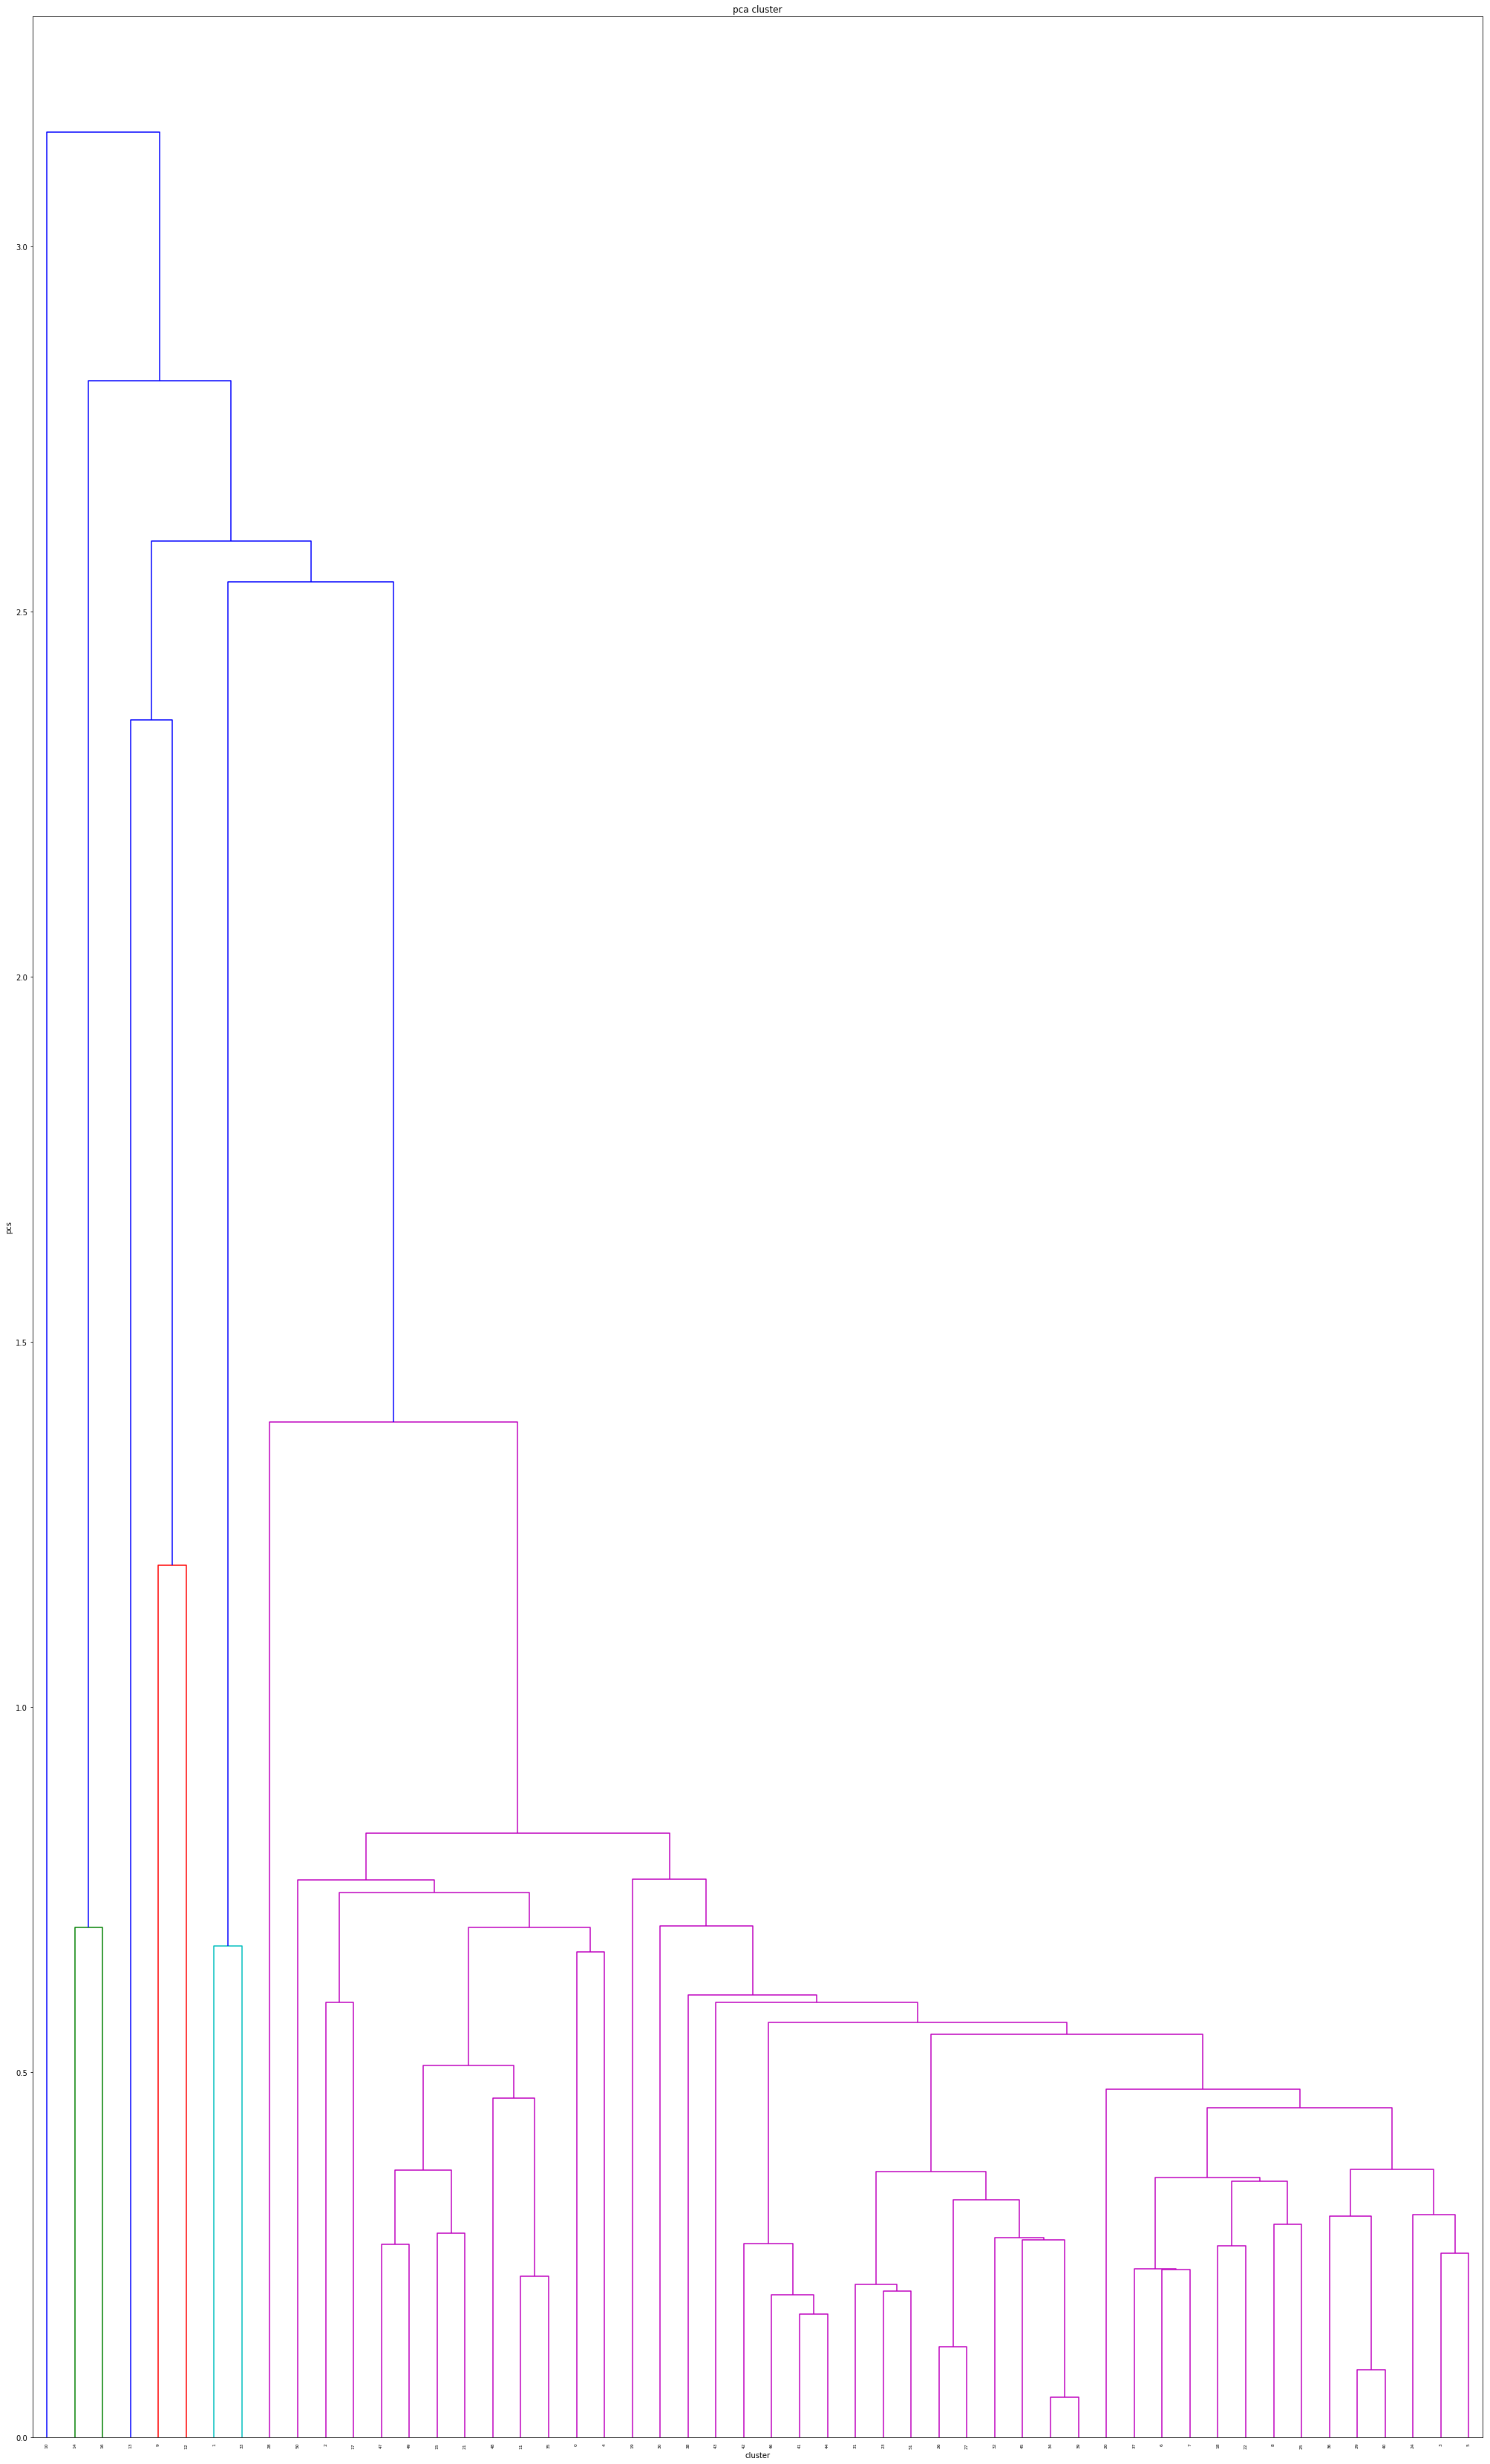

In [98]:
plt.figure(figsize=(35,60))
plt.title('pca cluster')
plt.xlabel('cluster')
plt.ylabel('pcs')

sch.dendrogram(z)
plt.show()
           

In [99]:
from sklearn.cluster import AgglomerativeClustering

In [100]:
hcluster=AgglomerativeClustering(n_clusters=5, linkage='average', affinity="euclidean").fit(new_df)
hcluster.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 4, 4, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [101]:
cluster_no = pd.DataFrame(hcluster.labels_)
(cluster_no)

,0
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,4


In [102]:
new_df['cluster']=cluster_no
new_df.head()

,0,1,cluster
0,-0.360454,-2.196355,1
1,-0.682141,4.614939,0
2,-1.961434,-1.116579,1
3,0.496182,-1.038391,1
4,-0.262125,-1.539030,1


In [73]:
new_df_cl=new_df.iloc[:,[2,0,1]]
new_df_cl.head()

,cluster,0,1
0,1,-0.360454,-2.196355
1,0,-0.682141,4.614939
2,1,-1.961434,-1.116579
3,1,0.496182,-1.038391
4,1,-0.262125,-1.539030


# elbow

In [112]:
x= new_df.iloc[:,[0,1]].values

In [113]:
from sklearn.cluster import KMeans

In [114]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)  #k means++ method is used to find the best K initial position 
                                                                    #of the the centroids

    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[308.19897067748536,
 197.49175746515925,
 120.11419980648952,
 95.34565977364156,
 73.6184906714231,
 54.457732042233886,
 40.57210336594535,
 31.90932057968968,
 25.434516058612907,
 21.255863139700203]

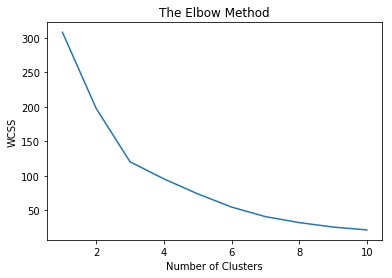

In [115]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [116]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

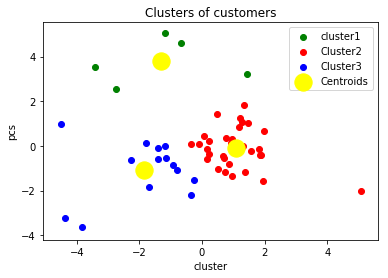

In [118]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],c='green',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],c='red',label='Cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],c='blue',label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('cluster')
plt.ylabel('pcs')
plt.legend()
plt.show()